# Proyecto Final Sistemas Inteligentes (1/2)
### Sistemas Inteligentes 

El proyecto consistió en entrenar una red neuronal artificial con el propósito de reconocer dígitos escritos a mano. El dataset usado fue el Modified National Instrument Standards and Technology database (**MNIST**), el cuál consiste de 70,000 imágenes (60,000 de entrenamiento, 10,000 de prueba) de dígitos escritos a mano. El dataset fue accesado a través de la [interfaz de datasets provista por el API de Keras](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data). 
MNIST fue usado bajo los términos de la licencia [Creative Commons](https://creativecommons.org/licenses/by-sa/3.0/) bajo la cuál se encuentra registrado. 

Para facilitar la interpretación se dividió el proyecto en dos libretas; esta libreta comprende la segmentación de dígitos a partir de tres imágenes de prueba usando KMeans y las pruebas ejecutadas usando el modelo generado. 

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter

Las siguientes celdas abren tres archivos [prueba1,prueba2,prueba3], invierten los colores (las imágenes están en negativo), las convierten a escala de grises para después convertirlas a un arreglo numpy. Prueba 1 y 2 contienen 10 dígitos a una resolución de 500x100px. Prueba 3 contiene 15 dígitos distribuidos a razón de tres líneas con una resolución de 1019x661px

In [2]:
#Abriendo las imagenes
prueba1 = Image.open("./test_data/prueba1.png")
prueba2 = Image.open("./test_data/prueba2.png")
prueba3 = Image.open("./test_data/prueba3.png")

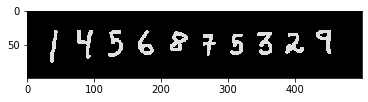

In [3]:
plt.imshow(prueba1)

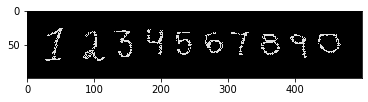

In [4]:
plt.imshow(prueba2)

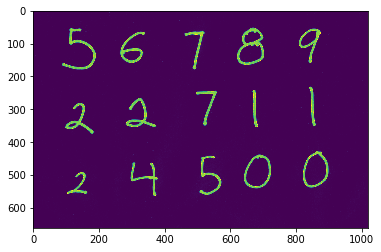

In [5]:
plt.imshow(prueba3)

Fue necesario invertir las imagenes y convertirlo a escala de grises para poder entrenar el algoritmo de agrupamiento apropiadamente

In [6]:
#invertir y pasar a escala de grises
gray1 = ImageOps.grayscale(ImageOps.invert(prueba1))
gray2 = ImageOps.grayscale(ImageOps.invert(prueba2))
gray3 = ImageOps.grayscale(ImageOps.invert(prueba3))

#generando arreglos y dimensiones
arr1 = np.asarray(gray1)
arr2 = np.asarray(gray2)
arr3 = np.asarray(gray3)

x1,y1 = arr1.shape
x2,y2 = arr2.shape
x3,y3 = arr3.shape


#creando arreglos de puntos, se invierten los índices para no copiar la imagen de forma inversa. 
points1 = [[j,i] for i in range(x1) for j in range(y1) if (arr1[i][j] < 125)]
points1 = np.array(points1)

points2 = [[j,i] for i in range(x2) for j in range(y2) if (arr2[i][j] < 125)]
points2 = np.array(points2)

points3 = [[j,i] for i in range(x3) for j in range(y3) if (arr3[i][j] < 125)]
points3 = np.array(points3)

## Segmentación Prueba1.png

Pasamos a segmentar las imágenes usando KMeans. Se define el n_clusters como el número de dígitos contenidos en la imagen. Se ejecuta el proceso primero para **Prueba1** con $nclusters = 10$

In [7]:
kmeans1 = KMeans(n_clusters=10)
%time kmeans1.fit(points1)
%time res1 = kmeans1.predict(points1)

CPU times: user 72.1 ms, sys: 2.64 ms, total: 74.8 ms
Wall time: 74.2 ms
CPU times: user 1.44 ms, sys: 256 µs, total: 1.69 ms
Wall time: 1.48 ms


Después, extraemos lo segmentado, se gráfica y almacena como imagen para después ser convertido a escala de grises, rotado e invertido. Se reconoce que esta no es la mejor implementación pero provee lo requerido. Al final de estas celdas quedamos con un arreglo de $tamaño = n clusters$ 

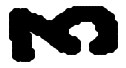

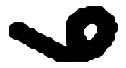

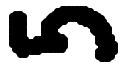

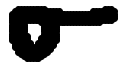

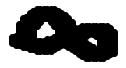

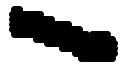

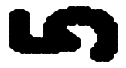

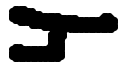

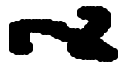

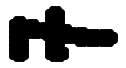

In [8]:
#extraer centros y labels
clusters1 = kmeans1.cluster_centers_.shape[0]
labels1 = kmeans1.labels_


#plotting y almacenando. 
for i in range(clusters1):
    cluster_i = points1[labels1 == i]
    plt.figure(figsize=(2,1))
    plt.scatter(cluster_i[:,1], cluster_i[:,0],c = '#000000')
    plt.axis('off')
    plt.savefig(str(i) +'-1.png')


seg_1 = []
    
for i in range(clusters1):    
    im = Image.open(str(i) +'-1.png').convert('L')
    im = ImageOps.invert(im)
    #usar Hamming resampling probó mejores resultados
    im = im.rotate(270, expand = True).resize((28,28), resample = Image.HAMMING)
    #im.save(str(i) +'.png')
    seg_1.append(np.asarray(im))

Se forman $nclusters$ vectores unidimensionales y se normalizan los valores de escala de grises. Se crean etiquetas en el orden que se generaron según el algoritmo de segmentación (los centros de los clústers no son generados en orden). Este proceso deberá realizarse cada vez que corra el código para poder comparar los resultados al ejecutar una petición al modelo. El orden de registro debe ser de arriba hacía abajo.

In [9]:
output1 = np.array(seg_1)
output1 = output1.reshape(10, 784)
output1 = output1/255
#correcto1 = es el arreglo de etiquetas usado para determinar los aciertos/errores generados por la predicción del algoritmo. Debe ser reescrito cada vez que el algoritmo de clustering sea ejecutado.
#Los resultados (desplegados en la celda anterior) se anotan de arriba hacia abajo 
correcto1 = [3,6,5,9,8,1,5,4,2,7]
correcto1 = np.array(correcto1)

## Segmentación Prueba2.png

Se ejecuta el proceso para **Prueba2** con $nclusters = 10$

In [11]:
kmeans2 = KMeans(n_clusters=10)
%time kmeans2.fit(points2)
%time res2 = kmeans2.predict(points2)

CPU times: user 68.2 ms, sys: 2.4 ms, total: 70.6 ms
Wall time: 70.5 ms
CPU times: user 1.65 ms, sys: 298 µs, total: 1.95 ms
Wall time: 1.67 ms


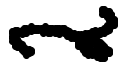

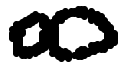

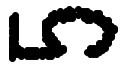

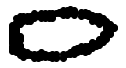

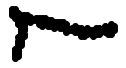

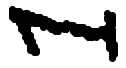

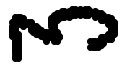

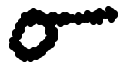

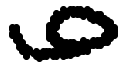

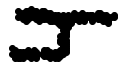

In [12]:
#extraer centros y labels
clusters2 = kmeans2.cluster_centers_.shape[0]
labels2 = kmeans2.labels_


#plotting y almacenando. 
for i in range(clusters2):
    cluster_i = points2[labels2 == i]
    plt.figure(figsize=(2,1))
    plt.scatter(cluster_i[:,1], cluster_i[:,0],c = '#000000')
    plt.axis('off')
    plt.savefig(str(i) +'-2.png')


seg_2 = []
    
for i in range(clusters2):    
    im = Image.open(str(i) +'-2.png').convert('L')
    im = ImageOps.invert(im)
    #usar Hamming resampling probó mejores resultados
    im = im.rotate(270, expand = True).resize((28,28), resample = Image.HAMMING)
    #im.save(str(i) +'.png')
    seg_2.append(np.asarray(im))

In [13]:
output2 = np.array(seg_2)
output2 = output2.reshape(10, 784)
output2 = output2/255
#correcto2 = es el arreglo de etiquetas usado para determinar los aciertos/errores generados por la predicción del algoritmo. Debe ser reescrito cada vez que el algoritmo de clustering sea ejecutado.
#Los resultados (desplegados en la celda anterior) se anotan de arriba hacia abajo 
correcto2 = [2,8,5,0,7,1,3,9,6,4]
correcto2 = np.array(correcto2)

## Segmentación Prueba3.png

Se ejecuta el proceso para **Prueba3** con $nclusters = 15$

In [14]:
kmeans3 = KMeans(n_clusters=15)
%time kmeans3.fit(points3)
%time res3 = kmeans3.predict(points3)

CPU times: user 921 ms, sys: 129 ms, total: 1.05 s
Wall time: 270 ms
CPU times: user 14.9 ms, sys: 2.7 ms, total: 17.6 ms
Wall time: 4.42 ms


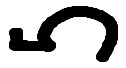

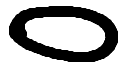

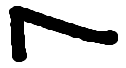

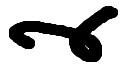

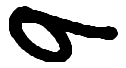

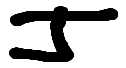

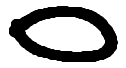

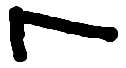

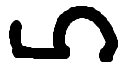

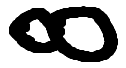

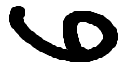

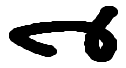

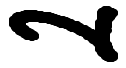

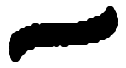

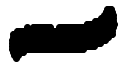

In [15]:
#extraer centros y labels
clusters3 = kmeans3.cluster_centers_.shape[0]
labels3 = kmeans3.labels_


#plotting y almacenando. 
for i in range(clusters3):
    cluster_i = points3[labels3 == i]
    plt.figure(figsize=(2,1))
    plt.scatter(cluster_i[:,1], cluster_i[:,0],c = '#000000')
    plt.axis('off')
    plt.savefig(str(i) +'-3.png')


seg_3 = []
    
for i in range(clusters3):    
    im = Image.open(str(i) +'-3.png').convert('L')
    im = ImageOps.invert(im)
    #usar Hamming resampling probó mejores resultados
    im = im.rotate(270, expand = True).resize((28,28), resample = Image.HAMMING)
    #im.save(str(i) +'.png')
    seg_3.append(np.asarray(im))

In [16]:
output3 = np.array(seg_3)
output3 = output3.reshape(15, 784)
output3 = output3/255
#correcto3 = es el arreglo de etiquetas usado para determinar los aciertos/errores generados por la predicción del algoritmo. Debe ser reescrito cada vez que el algoritmo de clustering sea ejecutado.
#Los resultados (desplegados en la celda anterior) se anotan de arriba hacia abajo 
correcto3 = [5,0,7,2,9,4,0,7,5,8,6,2,2,1,1]
correcto3 = np.array(correcto3)

## Realizando predicciones
Las siguientes líneas muestran las pruebas ejecutadas a las imagenes segmentadas. El modelo, un archivo llamado 'proyecto_mnist.h5', fue entrenado usando una libreta colab de Google. La implementación y el link a la libreta se describe en la segunda libreta del proyecto. Para correr esta libreta, tener el modelo en la misma carpeta. 

En los siguientes pasos se realizan predicciones a los arreglos que contienen los vectores extraídos de las imágenes de prueba, se comparan usando las etiquetas definidas (correcto_n) y después se gráfican las imágenes usadas con los resultados provistos por el modelo (**Res**) vs el resultado actual (**Ans**)

In [18]:
proyecto_mnist = tf.keras.models.load_model('./proyecto_mnist.h5')
proyecto_mnist.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

### Para Prueba1.png

In [19]:
prediccion1 = proyecto_mnist.predict_classes(output1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
indices_correctos = np.nonzero(prediccion1 == correcto1)[0]
indices_incorrectos = np.nonzero(prediccion1 != correcto1)[0]
print(len(indices_correctos)," clasificados correctamente")
print(len(indices_incorrectos)," clasificados incorrectamente")

8  clasificados correctamente
2  clasificados incorrectamente


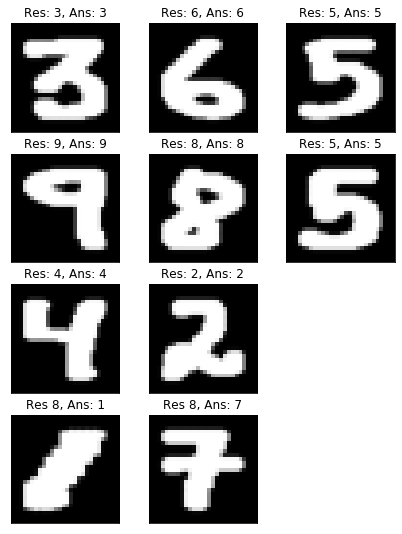

In [21]:
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()
# ploteando correctos
for i, correct in enumerate(indices_correctos[:10]):
    plt.subplot(6,3,i+1)
    plt.imshow(output1[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Res: {}, Ans: {}".format(prediccion1[correct],
                                        correcto1[correct]))
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(indices_incorrectos[:10]):
    plt.subplot(6,3,i+10)
    plt.imshow(output1[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Res {}, Ans: {}".format(prediccion1[incorrect], 
                                       correcto1[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

### Para Prueba2.png

In [22]:
prediccion2 = proyecto_mnist.predict_classes(output2)

In [23]:
indices_correctos2 = np.nonzero(prediccion2 == correcto2)[0]
indices_incorrectos2 = np.nonzero(prediccion2 != correcto2)[0]
print(len(indices_correctos2)," clasificados correctamente")
print(len(indices_incorrectos2)," clasificados incorrectamente")

6  clasificados correctamente
4  clasificados incorrectamente


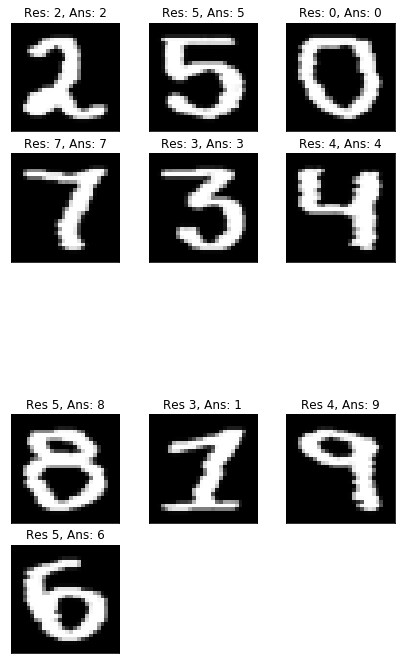

In [24]:
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation2 = plt.figure()
# ploteando correctos
for i, correct in enumerate(indices_correctos2[:10]):
    plt.subplot(6,3,i+1)
    plt.imshow(output2[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Res: {}, Ans: {}".format(prediccion2[correct],
                                        correcto2[correct]))
    plt.xticks([])
    plt.yticks([])


for i, incorrect in enumerate(indices_incorrectos2[:10]):
    plt.subplot(6,3,i+10)
    plt.imshow(output2[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Res {}, Ans: {}".format(prediccion2[incorrect], 
                                       correcto2[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

### Para Prueba3.png

In [25]:
prediccion3 = proyecto_mnist.predict_classes(output3)

In [26]:
indices_correctos3 = np.nonzero(prediccion3 == correcto3)[0]
indices_incorrectos3 = np.nonzero(prediccion3 != correcto3)[0]
print(len(indices_correctos3)," clasificados correctamente")
print(len(indices_incorrectos3)," clasificados incorrectamente")

12  clasificados correctamente
3  clasificados incorrectamente


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


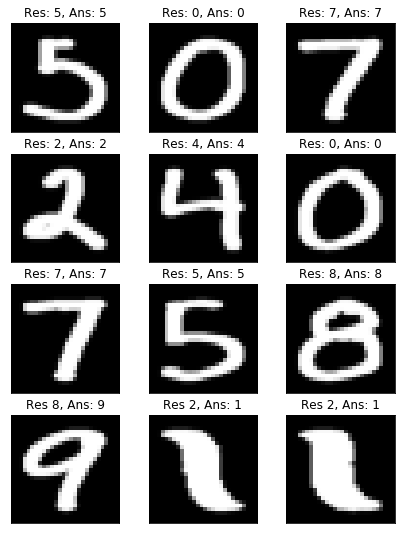

In [27]:
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation3 = plt.figure()
# ploteando correctos
for i, correct in enumerate(indices_correctos3[:12]):
    plt.subplot(6,3,i+1)
    plt.imshow(output3[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Res: {}, Ans: {}".format(prediccion3[correct],
                                        correcto3[correct]))
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(indices_incorrectos3[:3]):
    plt.subplot(6,3,i+10)
    plt.imshow(output3[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Res {}, Ans: {}".format(prediccion3[incorrect], 
                                       correcto3[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

En general, el modelo entrenado proveyó resultados considerados aceptables. Cabe destacar que se refinó la versión inicial para elevar un poco el accuracy. Para ello se analizaron recomendaciones e implementaciones de redes neuronales que cumplan con propósitos similares al de este proyecto. Estos cambios consisten en cambiar la capa de entrada por una densa, reemplazar y reformar el arreglo de arreglos de entrada (antes de dos dimensiones 28x28) por un arreglo de vectores de 784 representando los píxeles de la imagen con cada posición representando un valor de la escala de grises. Aunado a esto, se añadieron capas de dropout para evitar el overfitting. De la misma manera se reemplazo el optimizador stochastic gradient descent por el optimizador adam. Esto proveyó de mejores resultados al momento de servir el modelo entrenado. 